In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

In [30]:
df= pd.read_csv("data/prabowo.csv")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:10:46 +0000 2023,1735512698522382615,"@andre_rosiade eh botak, bilang ke capres lu d...",0,0,0,0,in,1718575798792355840,1735204525517177333,Yhafidzun15,https://twitter.com/Yhafidzun15/status/1735512...
1,1,Fri Dec 15 04:10:46 +0000 2023,1735512698086166538,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",0,0,0,0,in,1101762919,1735512698086166538,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126980...
2,2,Fri Dec 15 04:10:43 +0000 2023,1735512687281573985,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",0,0,0,0,in,1101762919,1735512687281573985,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126872...
3,3,Fri Dec 15 04:10:41 +0000 2023,1735512676552597739,@kurawa jokowi hebat....setuju tapi melihat pe...,0,0,0,0,in,1069905602,1735205387757146512,romobing,https://twitter.com/romobing/status/1735512676...
4,4,Fri Dec 15 04:10:38 +0000 2023,1735512663923490883,Prabowo prediksi AHY akan jadi pemimpin di tin...,0,0,0,0,in,1101762919,1735512663923490883,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126639...


In [31]:
df = df[["full_text", "username", "created_at"]]
df

,full_text,username,created_at
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,"@kompascom Memang tidak mudah, sekarang masyar...",HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,Visi Prabowo - Gibran membawa harapan baru bag...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,@supersaiyaindo @ch_chotimah2 Pembenaran akan ...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,Prabowo Gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


# CLEANING DATA

In [32]:
df.shape

(503, 3)

In [33]:
# menghapus data duplikat
df = df.drop_duplicates(subset = ["full_text"])

In [34]:
#melihat jumlah data yg terduplikasi
df.duplicated().sum()

0

In [35]:
# menghapus data kosong
df = df.dropna()

In [36]:
# melihat jumlah data yg kosong
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [37]:
df.shape

(502, 3)

FUNCTION PEMBERSIHAN

In [38]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hps mentions
    text = re.sub(r'#\w+', '', text)            # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)         # Remove retweet indicators
    text = re.sub(r'https?://\S+', '', text)    # Remove URLs
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)   # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()    # Strip extra whitespace
    
    return text

df['full_text'] = df['full_text'].apply(lambda x: clean_twitter_text(x))


In [39]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy prabowo bis...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ke ahy prabowo pemimpin yang hebat...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan pra...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,memang tidak mudah sekarang masyarakat mau tau...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,visi prabowo gibran membawa harapan baru bagi ...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,pembenaran akan selalu adatapi jika anda mau m...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,prabowo gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


# PREPROCESSING


In [40]:
# normalisasi
norm = {' yg ': ' yang ', ' prabowo ': " ", ' ganjar ': " ", ' nggak ': ' tidak ', ' ngga ': ' tidak ', ' gak ': ' tidak ', ' vibes ': ' suasana '}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy bisa menang...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ke ahy pemimpin yang hebat untuk b...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan di ...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,memang tidak mudah sekarang masyarakat mau tau...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,visi gibran membawa harapan baru bagi indonesi...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,pembenaran akan selalu adatapi jika anda mau m...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,prabowo gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


# STOPWORD

In [41]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,eh botak bilang capres lu dulu ngobrol ama ani...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy menang satu...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ahy pemimpin hebat bangsa indonesi...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju melihat penampilan debat 1 ...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy jadi pemimpin tingkat nas...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023


# Tokenize

In [42]:
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0      [eh, botak, bilang, capres, lu, dulu, ngobrol,...
1      [elektabilitas, tembus, 45, persen, ahy, menan...
2      [beri, pujian, ahy, pemimpin, hebat, bangsa, i...
3      [jokowi, hebatsetuju, melihat, penampilan, deb...
4      [prabowo, prediksi, ahy, jadi, pemimpin, tingk...
                             ...                        
498    [memang, mudah, sekarang, masyarakat, mau, tau...
499    [visi, gibran, membawa, harapan, baru, indones...
500    [pembenaran, selalu, adatapi, mau, merunut, ka...
501    [prabowo, gibran, berkomitmen, mengoptimalkan,...
502    [programprogram, prabowogibran, jembatan, menu...
Name: full_text, Length: 502, dtype: object

# STEMMING

In [43]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do =[]
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []    
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("hasilPreprocessingPrabowo.csv", index=False)


eh botak bilang capres lu dulu ngobrol ama anies bahas komitmen untuk nuntasin dibjakarta lama ngejabat gamau nyalonin bentuk apa pilpres 2019 karenaaa udh komitmen ama pak mau fokus jakartaaa dulu jadi gubernur gemes gw
elektabilitas tembus 45 persen ahy menang satu putar mua agusyudhoyono pdemokrat demokrat bareng ahy
beri puji ahy pimpin hebat bangsa indonesia muj pdemokrat agusyudhoyono demokrat bareng ahy
jokowi hebatsetuju lihat tampil debat 1 beliau salah pilih orang
prabowo prediksi ahy jadi pimpin tingkat nasional fc agusyudhoyono pdemokrat demokrat bareng ahy
acara hari seru banget sby djoko suyanto sutanto alumni akabri 19701973 hadir semua dekade08
warga indonesia butuh sosok pimpin seperti mas gibran ada
demokrat sumsel siap menang pasang prabowogibran pilpres 2024 vh pdemokrat agusyudhoyono demokrat bareng ahy
emang parah jijik sih bunuh karakter leceh personal anies saat debat kemaren pak gp aja mo nanya masalah ham pakai kata halus minta maaf dulu seblmnya makanya seran

# TRANSLATE

In [44]:
data = pd.read_csv('preprocessing/hasilPreprocessingPrabowo.csv', encoding='latin1')
data.head()

,full_text
0,eh botak bilang capres lu dulu ngobrol ama ani...
1,elektabilitas tembus 45 persen ahy prabowo men...
2,beri puji ahy prabowo pimpin hebat bangsa indo...
3,jokowi hebatsetuju lihat tampil prabowo debat ...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...


In [45]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv('terjemahan/TerjemahanPrabowo.csv')

# LABELING

In [55]:
data = pd.read_csv("terjemahan\TerjemahanPrabowo.csv", index_col=0)
data

,full_text,tweet_english
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...
...,...,...
302,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...
303,sdhlah sdh lalu bukti makan ego sendiri pak pr...,sdhlah sdh then evidence of eating his own ego...
304,elektabilitas prabowo gibran selalu unggul ahy...,electability prabowo gibran always superior ah...
305,jir striker prabowo,jir striker prabowo


In [56]:
status = []
total_positif = total_negatif = total_netral = total = 0

for tweet in data['tweet_english']:
    analysis = TextBlob(tweet)
    sentiment = 'netral'
    
    if analysis.sentiment.polarity > 0.0:
        sentiment = 'positif'
        total_positif += 1
    elif analysis.sentiment.polarity < 0.0:
        sentiment = 'negatif'
        total_negatif += 1
    else:
        total_netral += 1
    
    status.append(sentiment)
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 156
Netral = 102
Negatif = 49

Total Data : 307


In [57]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,negatif
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...,negatif
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,positif
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...,positif
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...,positif
...,...,...,...
302,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...,netral
303,sdhlah sdh lalu bukti makan ego sendiri pak pr...,sdhlah sdh then evidence of eating his own ego...,positif
304,elektabilitas prabowo gibran selalu unggul ahy...,electability prabowo gibran always superior ah...,positif
305,jir striker prabowo,jir striker prabowo,netral


# VISUALISASI

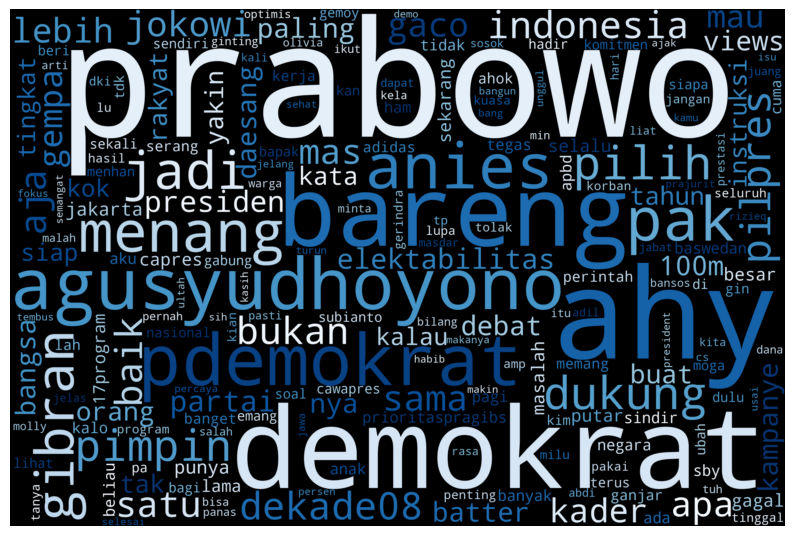

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)


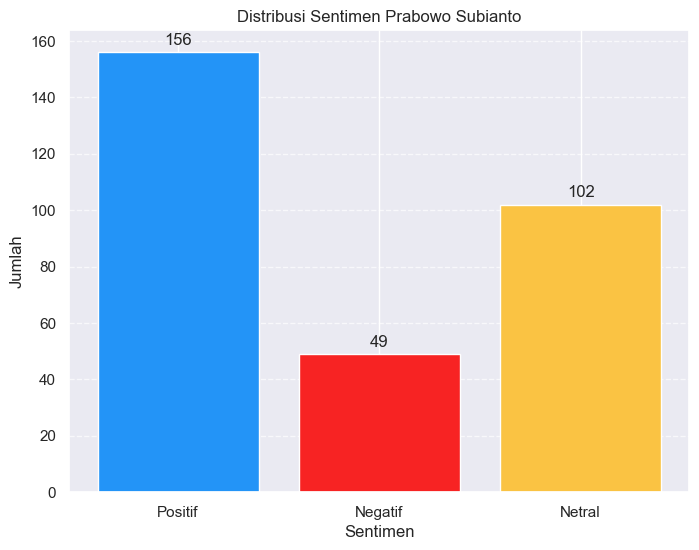

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Prabowo Subianto")


# Splitting Data dan Konversi Teks Menjadi Fitur Numerik

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Mengonversi teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['tweet_english']).toarray()

# Mengonversi label menjadi numerik
y = data['klasifikasi'].apply(lambda x: 1 if x == 'positif' else (0 if x == 'netral' else -1))

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)


# Melatih Model Gaussian Naive Bayes dan Memprediksi Hasil

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Melatih model GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Memprediksi set test
y_pred = model.predict(X_test)

# Mengevaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Classification Report:
              precision    recall  f1-score   support

          -1       0.25      0.20      0.22         5
           0       0.80      0.40      0.53        10
           1       0.73      1.00      0.84        16

    accuracy                           0.68        31
   macro avg       0.59      0.53      0.53        31
weighted avg       0.67      0.68      0.64        31

Accuracy: 0.6774193548387096


In [62]:
data

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,negatif
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...,negatif
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,positif
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...,positif
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...,positif
...,...,...,...
302,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...,netral
303,sdhlah sdh lalu bukti makan ego sendiri pak pr...,sdhlah sdh then evidence of eating his own ego...,positif
304,elektabilitas prabowo gibran selalu unggul ahy...,electability prabowo gibran always superior ah...,positif
305,jir striker prabowo,jir striker prabowo,netral


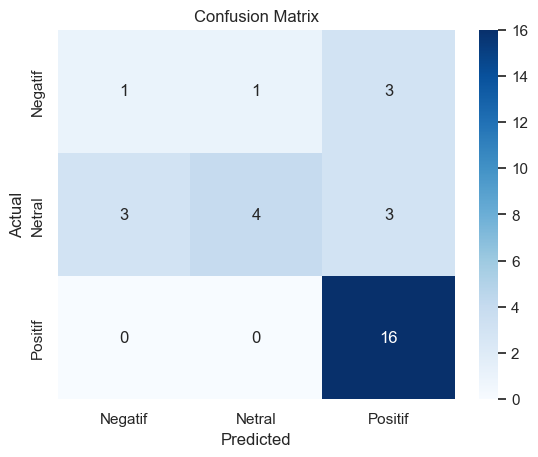

In [63]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
